In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
from tensorflow.keras.datasets import fashion_mnist

In [24]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_train=x_train.reshape(60000,28,28,1)/225
x_test=x_test.reshape(10000,28,28,1)/255

In [27]:
y_train[19]

4

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
## y變成分類型資料

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
y_train=to_categorical(y_train,10)

In [32]:
y_test=to_categorical(y_test,10)

In [33]:
y_train[19]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD

In [35]:
model=Sequential()

In [43]:
model.add(Conv2D(32,(3,3),padding="same",input_shape=(28,28,1),activation="relu"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [45]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [46]:
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))

In [47]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [48]:
model.add(Conv2D(128,(3,3),padding="same",activation="relu"))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(34,activation="relu"))

In [53]:
model.add(Dense(10,activation="softmax"))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 34)                2

In [55]:
model.compile(loss="mse",optimizer=SGD(lr=0.09),metrics=["accuracy"])

In [56]:
model.fit(x_train,y_train,batch_size=128,epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.0892 - acc: 0.1494
Epoch 2/12
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0773 - acc: 0.4527
Epoch 3/12
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0443 - acc: 0.6834
Epoch 4/12
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0357 - acc: 0.7459
Epoch 5/12
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0321 - acc: 0.7734
Epoch 6/12
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0297 - acc: 0.7940
Epoch 7/12
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0281 - acc: 0.8051
Epoch 8/12
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0268 - acc: 0.8156
Epoch 9/12
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0256 - acc: 0.8238
Epoch 10/12
60000/60000 [==============================] - 

In [57]:
result=model.predict_classes(x_test)

In [78]:
def my_predict(n):
    print("預測是",class_names[result[n]])
    X=x_test[n].reshape(28,28)
    plt.imshow(X,cmap="Greys")

預測是 Sandal


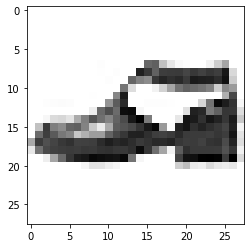

In [79]:
my_predict(23)

In [80]:
from ipywidgets import interact_manual

In [81]:
interact_manual(my_predict,n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [82]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 6s 596us/sample - loss: 0.0250 - acc: 0.8255


In [83]:
loss,acc=score

In [84]:
print("測試資料正確率為",acc)

測試資料正確率為 0.8255


In [85]:
model.save("CNNmodel.h5")